# Duality: Binary Classification and Density Estimation

The **duality** between binary classification and density estimation arises from the relationship between discriminative classifiers and generative models. The key idea is that training a binary classifier to distinguish between two distributions can implicitly estimate the **density ratio** of these distributions, which is central to unnormalized density estimation.

## Context
- **Binary classification** predicts whether a data point belongs to one of two classes.
- **Density estimation** involves modeling the probability distribution of data, often requiring the computation of probabilities or density functions.

## Duality Explained

### 1. Setup
- Let $p(x)$ be the **data distribution** (e.g., observed samples).
- Let $q(x)$ be a **model distribution** (e.g., a prior or generated distribution).
- Combine these into a binary classification problem:
  - Label samples from $p(x)$ as $y = 1$.
  - Label samples from $q(x)$ as $y = 0$.

### 2. Binary Classifier
A binary classifier learns $P(y = 1 \mid x)$, the probability that a given $x$ comes from $p(x)$ rather than $q(x)$. Using **Bayes' rule**:
$$
P(y = 1 \mid x) = \frac{p(x)}{p(x) + q(x)}
$$
Similarly:
$$
P(y = 0 \mid x) = \frac{q(x)}{p(x) + q(x)}
$$

### 3. Density Ratio
Rearranging $P(y = 1 \mid x)$:
$$
\frac{p(x)}{q(x)} = \frac{P(y = 1 \mid x)}{P(y = 0 \mid x)}
$$
Thus, the **density ratio** $\frac{p(x)}{q(x)}$, key for unnormalized density estimation, can be directly inferred from the classifier’s predictions.

### 4. Log-Loss Optimization
Training the binary classifier via **log-loss** minimizes:
$$
\mathbb{E}_{x \sim p}[\log P(y = 1 \mid x)] + \mathbb{E}_{x \sim q}[\log P(y = 0 \mid x)]
$$
This is equivalent to minimizing a divergence (e.g., Jensen-Shannon or Kullback-Leibler) between $p(x)$ and $q(x)$.

### 5. Generative Models and NCE
- In **Noise Contrastive Estimation (NCE)**, the classifier’s role is explicitly used to estimate the parameters of $q(x)$ by contrasting $q(x)$ with $p(x)$.
- In **Generative Adversarial Networks (GANs)**, the generator adjusts $q(x)$ to confuse the discriminator (binary classifier), implicitly improving $q(x)$ as an approximation of $p(x)$.

## Summary
The duality highlights that:
1. **Binary classifiers learn density ratios**, connecting classification and density estimation.
2. This forms the foundation for methods like **NCE** and **GANs**, where classifiers guide generative models to approximate complex distributions.

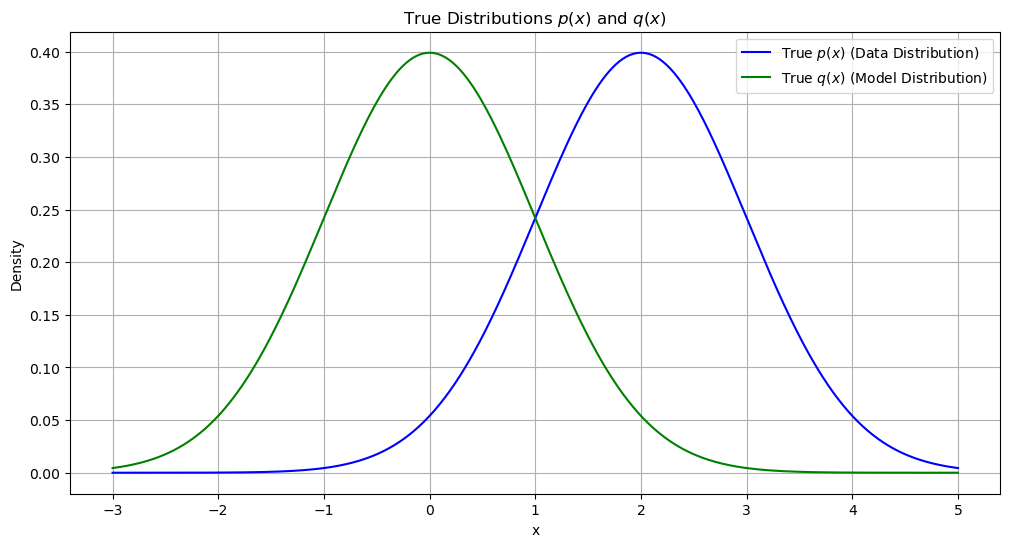

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
p_samples = np.random.normal(loc=2, scale=1, size=n_samples)  # p(x): N(2, 1)
q_samples = np.random.normal(loc=0, scale=1, size=n_samples)  # q(x): N(0, 1)

# Combine into a binary classification dataset
X = np.concatenate([p_samples, q_samples]).reshape(-1, 1)
y = np.concatenate([np.ones(n_samples), np.zeros(n_samples)])

# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Train a logistic regression model for binary classification
clf = LogisticRegression()
clf.fit(X, y)

# Predict probabilities
p_y1_given_x = clf.predict_proba(X)[:, 1]  # P(y=1|x)
p_y0_given_x = clf.predict_proba(X)[:, 0]  # P(y=0|x)

# Estimate density ratio p(x)/q(x)
density_ratio = p_y1_given_x / p_y0_given_x

# Plot true distributions and density ratio separately
x_vals = np.linspace(-3, 5, 500).reshape(-1, 1)
p_pdf = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x_vals - 2)**2)  # True p(x)
q_pdf = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * x_vals**2)         # True q(x)
p_y1_given_x_vals = clf.predict_proba(x_vals)[:, 1]
p_y0_given_x_vals = clf.predict_proba(x_vals)[:, 0]
density_ratio_vals = p_y1_given_x_vals / p_y0_given_x_vals

# Plot 1: True distributions p(x) and q(x)
plt.figure(figsize=(12, 6))
plt.plot(x_vals, p_pdf, label="True $p(x)$ (Data Distribution)", color="blue")
plt.plot(x_vals, q_pdf, label="True $q(x)$ (Model Distribution)", color="green")
plt.title("True Distributions $p(x)$ and $q(x)$")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


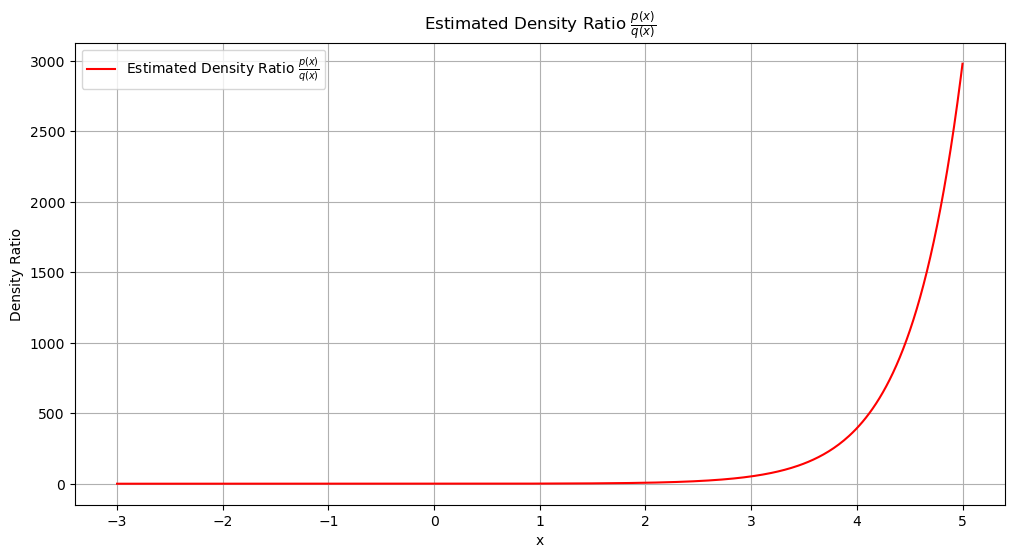

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(x_vals, density_ratio_vals, label="Estimated Density Ratio $\\frac{p(x)}{q(x)}$", color="red")
plt.title("Estimated Density Ratio $\\frac{p(x)}{q(x)}$")
plt.xlabel("x")
plt.ylabel("Density Ratio")
plt.legend()
plt.grid()
plt.show()